<a href="https://colab.research.google.com/github/wallisonferreira/analise-exploratoria-mercados/blob/master/pre_processing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré-processamento

Neste arquivo está sendo feita uma sequência de tarefas para limpeza dos dados. Lidamos com uma base de cerca de 3800 registros e 23 features contendo, dentre eles, valores vazios em intervalos distintos.

Para que possamos fazer generalizações com análise de regressão é necessário que sejam excluídos os valores vazios por que eles podem enviesar o nosso modelo atribuindo pesos inconsistentes.

Uma outra técnica que também pode ser utilizada é a de interpolação de dados vazios (geralmente até 3 dados vazios em sequência), quando o intervalo de valores vazios é muito pequeno ou quando o valor vazio está isolado entre os dados.

In [77]:
# conecta ao google drive
#from google.colab import drive
#drive.mount('/content/drive')

In [78]:
# importa bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
# importa os dados de mercado
market = pd.read_csv("/content/drive/My Drive/Análise Exploratória/Dados/market_data.v6.csv", index_col=0)

In [80]:
# registros e colunas
market.shape

(3800, 23)

In [81]:
market.head(5)

,Date,GoogleTrends,Bitcoin_DD,MarketPrice,TradeVolume,NewPosts,NewMembers,PageViews,Difficulty,CostPerTransaction,CostPerTransactionPercent,EstimTransactionVolume,MedConfirmationTime,NumOfAddresses,NumOfTransactions,OutputVolume,TotalBitcoins,TransactionFees,TransactionFeesUSD,DowJones,EURUSD,USDEUR,OilPrice
0,2009-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,50.0,50.0,0.0,0.0,9034.69,1.39,0.72,40.44
1,2009-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,9034.69,1.39,0.72,40.44
2,2009-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,8952.89,1.36,0.74,43.98
3,2009-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,9015.10,1.34,0.74,46.32
4,2009-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,8769.70,1.37,0.73,45.43


In [90]:
# visualizando tipos de cada coluna
market.dtypes

Date                          object
GoogleTrends                 float64
Bitcoin_DD                   float64
MarketPrice                  float64
TradeVolume                  float64
NewPosts                     float64
NewMembers                   float64
PageViews                    float64
Difficulty                   float64
CostPerTransaction           float64
CostPerTransactionPercent    float64
EstimTransactionVolume       float64
MedConfirmationTime          float64
NumOfAddresses               float64
NumOfTransactions            float64
OutputVolume                 float64
TotalBitcoins                float64
TransactionFees              float64
TransactionFeesUSD           float64
DowJones                     float64
EURUSD                       float64
USDEUR                       float64
OilPrice                     float64
dtype: object

In [91]:
# visualizando valores vazios não incluindo zeros
def empty_values(data):
  columns = data.columns

  return pd.DataFrame({ \
                      'Columns':[col for col in columns if col != 'Date'], \
                      'Empty':[data[col].isnull().sum() for col in columns if col != 'Date'], \
                      'Empty(%)':[data[col].isnull().sum()/data[col].isnull().count() for col in columns if col != 'Date']})

empty_values(data = market)

,Columns,Empty,Empty(%)
0,GoogleTrends,563,0.148158
1,Bitcoin_DD,1316,0.346316
2,MarketPrice,591,0.155526
3,TradeVolume,571,0.150263
4,NewPosts,894,0.235263
5,NewMembers,969,0.255000
6,PageViews,1570,0.413158
7,Difficulty,5,0.001316
8,CostPerTransaction,591,0.155526
9,CostPerTransactionPercent,263,0.069211


In [84]:
# substitui todos os zeros por NaN
market1 = market

market1.replace(0.0, np.nan, inplace=True)

In [85]:
# gerando o dataframe de vazios
empty_market1 = empty_values(data = market1)

In [92]:
# visualizando vazios juntando zeros transformados e nulos
empty_market1 

,Columns,Empty,Empty(%)
0,GoogleTrends,563,0.148158
1,Bitcoin_DD,1316,0.346316
2,MarketPrice,591,0.155526
3,TradeVolume,571,0.150263
4,NewPosts,894,0.235263
5,NewMembers,969,0.255000
6,PageViews,1570,0.413158
7,Difficulty,5,0.001316
8,CostPerTransaction,591,0.155526
9,CostPerTransactionPercent,263,0.069211


In [87]:
# calcula o número de dados vazios em cada linha
count_nulls = market1.isnull().sum(axis=1)

Vamos visualizar os dados em gráfico, Assim, podemos tirar conclusões melhores sobre a localização dos dados vazios.

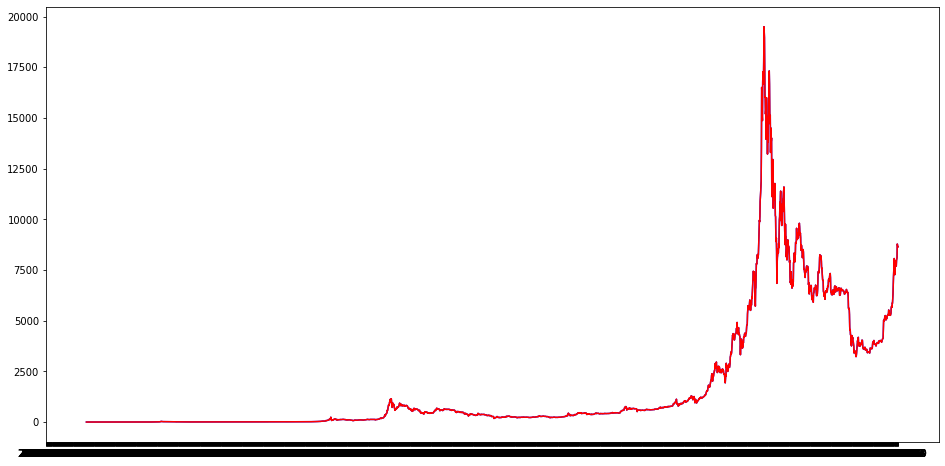

In [88]:
# Market Price
%matplotlib inline
fig = plt.figure(figsize=(16,8))
ax = plt.axes()
ax.plot(market['Date'], market['MarketPrice'],'-b')
ax.plot(market1['Date'], market1['MarketPrice'],'-r')
fig.show();

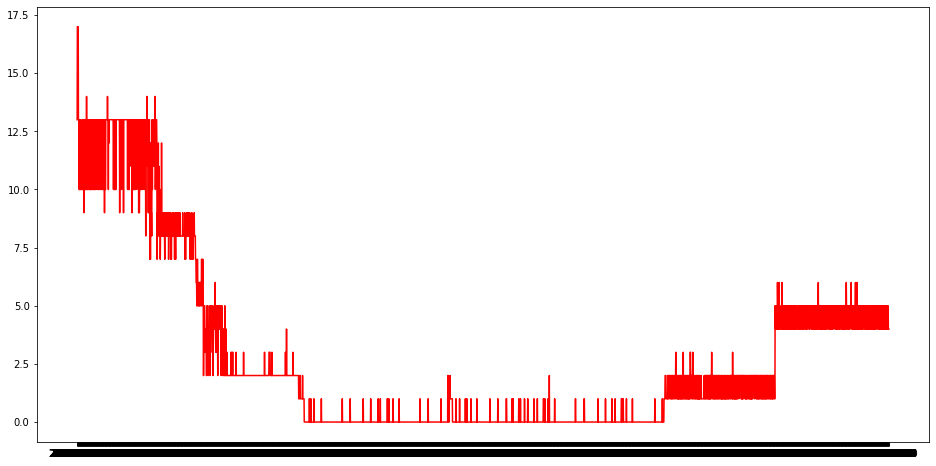

In [89]:
# soma de valores nulos por dia
fig = plt.figure(figsize=(16,8))
ax = plt.axes()
ax.plot(market1['Date'], count_nulls,'-r')
fig.show();

Pode-se ver, acima, que há um intervalo muito grande de dados vazios que corresponde a mais 50% da base. Os dados vazios aparecem inclusive concentrados em datas onde o movimento da variável explicada é muito grande (Lado direito).

Alternativas para lidar com esse problema:

* Selecionar somente o intervalo, concentrados no meio do gráfico, e realizar a exclusão dos dados extremos;
* Selecionar apenas as features com menos valores vazios;
* Selecionar do intervalo do meio para a direita, excluindo features com grandes intervalos de vazios;